In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np 
import os 
path = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_19_Consumer_behavior_and_pricing


In [5]:
pineapple = pd.read_csv("{0}/Pinapple_juice.csv".format(path))

In [7]:
pineapple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             366 non-null    int64  
 1   Pinapple juice  366 non-null    int64  
 2   Price           366 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 8.7 KB


In [8]:
X = pineapple[['Price']]
y = pineapple[['Pinapple juice']]

In [9]:
model = LinearRegression().fit(X,y)

In [10]:
model

LinearRegression()

In [11]:
intercept = model.intercept_[0]
print(intercept)

200.0


In [13]:
coef = model.coef_[0]
print(coef)

[-50.]


In [14]:
pineapple.describe()

,Day,Pinapple juice,Price
count,366.000000,366.000000,366.000000
mean,183.500000,130.581967,1.388361
std,105.799338,21.321996,0.426440
min,1.000000,72.000000,0.220000
25%,92.250000,117.000000,1.100000
50%,183.500000,130.000000,1.400000
75%,274.750000,145.000000,1.660000
max,366.000000,189.000000,2.560000


In [15]:
simuation_data = pd.DataFrame({
    'price': np.linspace(0.1, 5, 300)
})

In [16]:
simuation_data['demand'] = intercept + simuation_data['price'] * coef

In [17]:
simuation_data['cost'] = simuation_data['demand'] * 0.7

In [18]:
simuation_data['revenue'] = simuation_data['demand'] * simuation_data['price']

In [20]:
simuation_data['profit'] = simuation_data['revenue'] - simuation_data['cost']

In [21]:
import matplotlib.pyplot as plt 

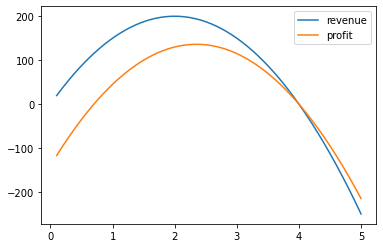

In [22]:
plt.plot(simuation_data['price'], simuation_data['revenue'], label = 'revenue')
plt.plot(simuation_data['price'], simuation_data['profit'], label = 'profit')
plt.legend(loc='upper right')

In [23]:
max_revenue = simuation_data[simuation_data['revenue'] == max(simuation_data['revenue'])]
max_profit = simuation_data[simuation_data['profit'] == max(simuation_data['profit'])]

In [26]:
print(max_revenue)
print(max_profit)

        price     demand       cost    revenue      profit
116  2.001003  99.949833  69.964883  199.99995  130.035067
        price     demand       cost     revenue      profit
137  2.345151  82.742475  57.919732  194.043557  136.123824


In [24]:
# Elasticity
# e = - (d(p)' * p)/ d(p)

In [25]:
e = (-1* coef * 2.2)/(200 + 2.2* coef)

In [27]:

import inventorize as inv

inv.linear_elasticity(pineapple['Price'], 
                      pineapple['Pinapple juice'], 2.2, 0.7)



{'Elasticity': array([[1.22222222]]),
 'optimum_price_profit': array([[2.35]]),
 'optimum_price_revenue': array([[2.]])}